In [32]:
import streamlit as st
import datetime as dt
import pydeck as pdk
from PIL import Image
import requests
import random
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageFilter
import numpy as np
import cv2


# Smoothing and vectorize the model output array

In [33]:
def smooth_and_vectorize(array, smoothing):
    # Convert numpy array to PIL Image
    array_rgba = np.zeros((512, 512, 4), dtype=np.uint8)
    array_rgba[:, :, 0] = array  # Copy the grayscale values to all RGB channels
    array_rgba[:, :, 1] = array
    array_rgba[:, :, 2] = array
    array_rgba[:, :, 3] = np.where(array == 255, 0, 255)  # Set alpha channel based on white pixels
    
    image = Image.fromarray(array_rgba)

    # Apply Median Filter
    med_img = image.filter(ImageFilter.MedianFilter(size=smoothing))

    # Convert the smoothed image to grayscale
    smoothed_image = med_img.convert("L")

    # Convert to numpy array
    smoothed_array = np.array(smoothed_image)

    # Binarize the smoothed image (invert the binary image)
    _, binary_image = cv2.threshold(smoothed_array, 127, 255, cv2.THRESH_BINARY_INV)

    # Create a mask from the binary image
    mask = Image.fromarray(binary_image).convert("L")

    # Create an RGBA image with the specified color
    color = (255, 0, 0, 255)  # Red color with full opacity
    color_img = Image.new("RGBA", image.size, color)

    # Composite the color image with the mask
    smooth_coloured_vector = Image.composite(color_img, Image.new("RGBA", image.size, (0, 0, 0, 0)), mask)

    # Save as PNG
    smooth_coloured_vector.save("smoothed_red.png")

# Testing

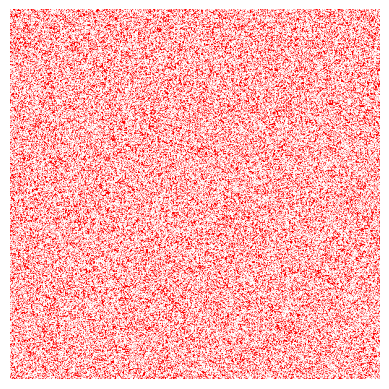

In [24]:
import numpy as np
import matplotlib.pyplot as plt

# Create the initial array with random distribution of 0s and 255s
array = np.random.choice([0, 255], size=(512, 512))

# Convert to RGBA (adding an alpha channel)
array_rgba = np.zeros((512, 512, 4), dtype=np.uint8)
array_rgba[:, :, 0] = array  # Copy the grayscale values to all RGB channels
array_rgba[:, :, 1] = array
array_rgba[:, :, 2] = array
array_rgba[:, :, 3] = np.where(array == 255, 0, 255)  # Set alpha channel based on white pixels

# Modify the black part to be red
array_rgba[array_rgba[:,:,0] == 0] = [255, 0, 0, 255]  # Set black pixels to red with full opacity

# Display the image with transparency
plt.imshow(array_rgba)
plt.axis('off')  # Turn off axes

# Save as PNG
plt.savefig("red_black.png", bbox_inches='tight', pad_inches=0)
plt.show()


In [25]:
from PIL import Image, ImageFilter
import numpy as np
import cv2

# Convert numpy array to PIL Image
image = Image.fromarray(array_rgba)

# Apply Median Filter
med_img = image.filter(ImageFilter.MedianFilter(size=3))

# Convert the smoothed image to grayscale
smoothed_image = med_img.convert("L")

# Convert to numpy array
smoothed_array = np.array(smoothed_image)

# Binarize the smoothed image (invert the binary image)
_, binary_image = cv2.threshold(smoothed_array, 127, 255, cv2.THRESH_BINARY_INV)

# Create a mask from the binary image
mask = Image.fromarray(binary_image).convert("L")

# Create an RGBA image with the specified color
color = (255, 0, 0, 255)  # Red color with full opacity
color_img = Image.new("RGBA", image.size, color)

# Composite the color image with the mask
smooth_coloured_vector = Image.composite(color_img, Image.new("RGBA", image.size, (0, 0, 0, 0)), mask)

# Save as PNG
smooth_coloured_vector.save("smoothed_red.png")

In [34]:
array = np.random.choice([0, 255], size=(512, 512))

smooth_and_vectorize(array, 5)

# Old vector code

In [ ]:
from PIL import Image, ImageFilter
import cv2
import numpy as np
#from IPython.display import display

def smooth_and_vectorize_png(image_path, smoothing, color):
    '''
    Takes a png, smooths the edges, turns it into a png with a transparent background and colors the forest area.
    
    smoothing = level of median smoothing [odd integers: 1, 3, 5, 7 etc], 
    color = string in hexcode #FF0000 
    '''
    # Load the image and apply median smoothing
    image = Image.open(image_path).convert("RGBA")
    med_img = image.filter(ImageFilter.MedianFilter(size=smoothing))
    
    # Convert the smoothed image to grayscale
    smoothed_image = cv2.cvtColor(np.array(med_img), cv2.COLOR_RGBA2GRAY)
    
    # Binarize the smoothed image (invert the binary image)
    _, binary_image = cv2.threshold(smoothed_image, 127, 255, cv2.THRESH_BINARY_INV)
    
    # Create a mask from the binary image
    mask = Image.fromarray(binary_image).convert("L")
    
    # Create an RGBA image with the specified color
    color_img = Image.new("RGBA", image.size, color)
    
    # Composite the color image with the mask
    smooth_coloured_vector = Image.composite(color_img, Image.new("RGBA", image.size, (0, 0, 0, 0)), mask)
    
    # # Save the final image
    # final_output_path = 'smoothed_png.png'
    # final_img.save(final_output_path)
    
    # Display the final image
    # display(final_img)

# Example usage:
